# E-commerce Cart Abandonment Rate Analysis (2023-2024)

## Project Description
This project aims to deeply analyze the cart abandonment rates, customer behavior, and sales performance of an e-commerce platform in Turkey for the years 2023 and 2024. Actionable insights and recommendations have been developed to reduce cart abandonment and increase customer conversion.

## Used Dataset
The analysis is based on simulated e-commerce data collected on a monthly basis. The dataset includes the following columns:
- `Date`: The last day of the month to which the data belongs.
- `Total_Transactions`: The total number of online transactions that occurred in the respective month.
- `Cart_Abandonment_Rate_PCT`: The cart abandonment rate for the respective month (percentage).
- `Average_Cart_Value_TL`: The average cart value for the respective month (Turkish Lira).
- `Credit_Card_Share_PCT`: The share of payments made by credit card out of total payments (percentage).
- `Bank_Transfer_Share_PCT`: The share of payments made by bank transfer/EFT out of total payments (percentage).
- `Cash_On_Delivery_Share_PCT`: The share of payments made by cash on delivery out of total payments (percentage).
- `Top_Selling_Sector`: The sector with the highest sales in the respective month.
- `Sector_Sales_Share_PCT`: The share of the top-selling sector in total sales (percentage).

## Tools Used
- **Python:** The primary programming language for data analysis and modeling.
- **Pandas:** A powerful library for data manipulation and analysis.
- **Matplotlib & Seaborn:** Libraries used for data visualization.
- **NumPy:** Fundamental library for numerical operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

sns.set_palette("viridis")
sns.set_style("whitegrid")


In [2]:
def load_data(path):
    try:
        df = pd.read_csv(path)
        df['Date'] = pd.to_datetime(df['Date'])
        return df
    except FileNotFoundError:
        print(f"Error: File not found at path: {path}")
    except Exception as e:
        print(f"An error occurred while loading data: {e}")


In [3]:
def plot_cart_abandon_rate(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Cart_Abandonment_Rate_PCT'], marker='o', linestyle='-', color='skyblue')
    plt.title('E-commerce Cart Abandonment Rate in Turkey (2023-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cart Abandonment Rate (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_data_quality(df):
    print("\n--- Data Quality Check ---")
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nGeneral Statistics:")
    print(df.describe())
    print("\nUnique Values for Categorical Columns:")
    for col in df.select_dtypes(include='object').columns:
        print(f"- {col}: {df[col].unique()}")

def analyze_time_series_metrics(df):
    print("\n--- Time Series Analysis of Key Metrics ---")
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

    axes[0].plot(df['Date'], df['Total_Transactions'], marker='o', linestyle='-', color='orange')
    axes[0].set_title('Total Online Transactions (2023-2024)')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Transaction Count')
    axes[0].grid(True)

    axes[1].plot(df['Date'], df['Average_Cart_Value_TL'], marker='o', linestyle='-', color='green')
    axes[1].set_title('Average Cart Value (TL) (2023-2024)')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Average Cart Value (TL)')
    axes[1].grid(True)

    axes[2].plot(df['Date'], df['Credit_Card_Share_PCT'], marker='o', linestyle='-', label='Credit Card Share (%)', color='purple')
    axes[2].plot(df['Date'], df['Cash_On_Delivery_Share_PCT'], marker='o', linestyle='-', label='Cash on Delivery Share (%)', color='brown')
    axes[2].set_title('Payment Method Shares (2023-2024)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Share (%)')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

def analyze_sector_performance(df):
    print("\n--- Sector Performance Analysis ---")
    sector_summary = df.groupby('Top_Selling_Sector').agg(
        Avg_Abandon_Rate=('Cart_Abandonment_Rate_PCT', 'mean'),
        Avg_Cart_Value=('Average_Cart_Value_TL', 'mean'),
        Avg_Transaction_Count=('Total_Transactions', 'mean'),
        Avg_Sales_Share=('Sector_Sales_Share_PCT', 'mean')
    ).sort_values(by='Avg_Abandon_Rate', ascending=False)

    print("\nAverage Metrics by Sector:")
    print(sector_summary)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    sns.barplot(x=sector_summary.index, y=sector_summary['Avg_Abandon_Rate'], ax=axes[0])
    axes[0].set_title('Average Cart Abandonment Rate by Sector')
    axes[0].set_xlabel('Sector')
    axes[0].set_ylabel('Avg. Abandon Rate (%)')
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=sector_summary.index, y=sector_summary['Avg_Cart_Value'], ax=axes[1])
    axes[1].set_title('Average Cart Value by Sector')
    axes[1].set_xlabel('Sector')
    axes[1].set_ylabel('Avg. Cart Value (TL)')
    axes[1].tick_params(axis='x', rotation=45)

    sns.barplot(x=sector_summary.index, y=sector_summary['Avg_Transaction_Count'], ax=axes[2])
    axes[2].set_title('Average Transaction Count by Sector')
    axes[2].set_xlabel('Sector')
    axes[2].set_ylabel('Avg. Transaction Count')
    axes[2].tick_params(axis='x', rotation=45)

    sns.barplot(x=sector_summary.index, y=sector_summary['Avg_Sales_Share'], ax=axes[3])
    axes[3].set_title('Average Sales Share by Sector')
    axes[3].set_xlabel('Sector')
    axes[3].set_ylabel('Avg. Sales Share (%)')
    axes[3].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


def analyze_payment_method_impact(df):
    print("\n--- Analysis of Payment Method Impact on Cart Abandonment ---")
    
    numerical_cols = ['Cart_Abandonment_Rate_PCT', 'Average_Cart_Value_TL',
                      'Credit_Card_Share_PCT', 'Cash_On_Delivery_Share_PCT',
                      'Total_Transactions', 'Sector_Sales_Share_PCT'] 
    
    available_numerical_cols = [col for col in numerical_cols if col in df.columns]
    
    correlation_matrix = df[available_numerical_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.scatterplot(x='Credit_Card_Share_PCT', y='Cart_Abandonment_Rate_PCT', data=df, ax=axes[0])
    axes[0].set_title('Credit Card Share vs. Cart Abandonment Rate')
    axes[0].set_xlabel('Credit Card Share (%)')
    axes[0].set_ylabel('Cart Abandonment Rate (%)')
    axes[0].grid(True)

    sns.scatterplot(x='Cash_On_Delivery_Share_PCT', y='Cart_Abandonment_Rate_PCT', data=df, ax=axes[1])
    axes[1].set_title('Cash on Delivery Share vs. Cart Abandonment Rate')
    axes[1].set_xlabel('Cash on Delivery Share (%)')
    axes[1].set_ylabel('Cart Abandonment Rate (%)')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

def analyze_average_cart_value(df):
    print("\n--- Average Cart Value Analysis ---")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Average_Cart_Value_TL'], kde=True, bins=10) 
    plt.title('Distribution of Average Cart Value')
    plt.xlabel('Average Cart Value (TL)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Average_Cart_Value_TL', y='Cart_Abandonment_Rate_PCT', data=df)
    plt.title('Average Cart Value vs. Cart Abandonment Rate')
    plt.xlabel('Average Cart Value (TL)')
    plt.ylabel('Cart Abandonment Rate (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def run_all_analysis(df):
    print("\n--- Comprehensive EDA Started ---")

    analyze_data_quality(df)
    
    print("\n--- Cart Abandonment Rate Time Series Analysis ---")
    plot_cart_abandon_rate(df)

    analyze_time_series_metrics(df) 

    analyze_sector_performance(df)

    analyze_payment_method_impact(df)

    analyze_average_cart_value(df)

    print("\n--- Comprehensive EDA Completed ---")


Attempting to load data from: ../data/turkiye_e_ticaret_simule_veri.csv
File found, loading...
--- Dataset Information ---
        Date  Total_Transactions  Cart_Abandonment_Rate_PCT  \
0 2023-01-31           599900595                      71.17   
1 2023-02-28           456755036                      70.59   
2 2023-03-31           591100010                      77.31   
3 2023-04-30           527521863                      77.69   
4 2023-05-31           555299516                      60.00   

   Average_Cart_Value_TL  Credit_Card_Share_PCT  Bank_Transfer_Share_PCT  \
0                 492.99                  63.73                    25.63   
1                 498.34                  50.82                    26.79   
2                 462.55                  62.82                    22.31   
3                 461.08                  60.13                    24.66   
4                 547.44                  62.37                    29.41   

   Cash_On_Delivery_Share_PCT  Top_Sellin

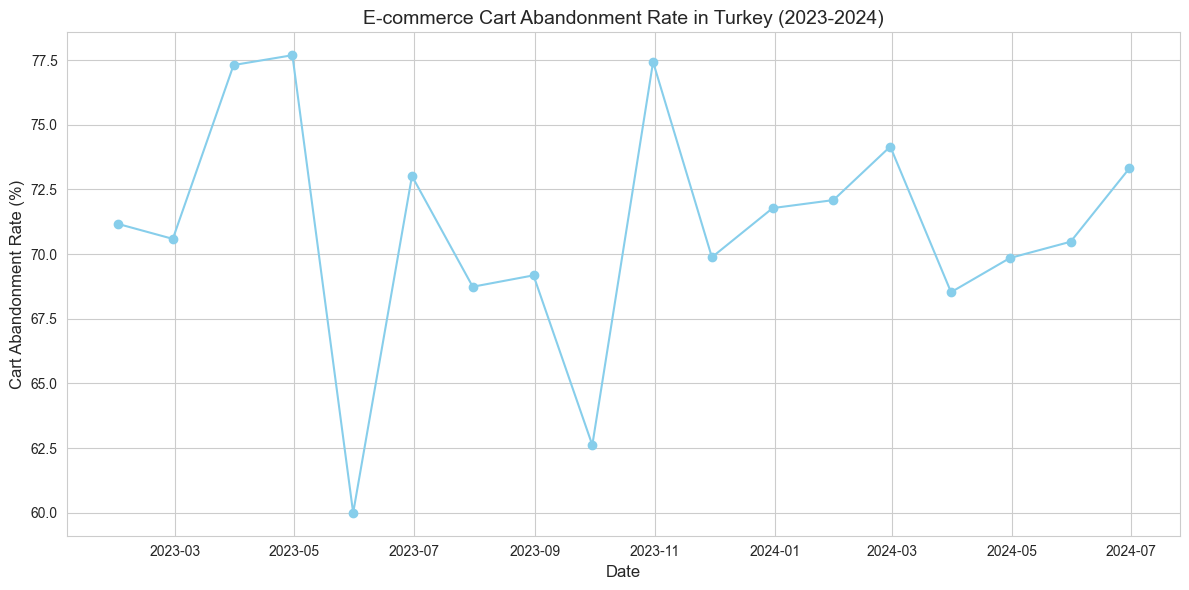


--- Time Series Analysis of Key Metrics ---


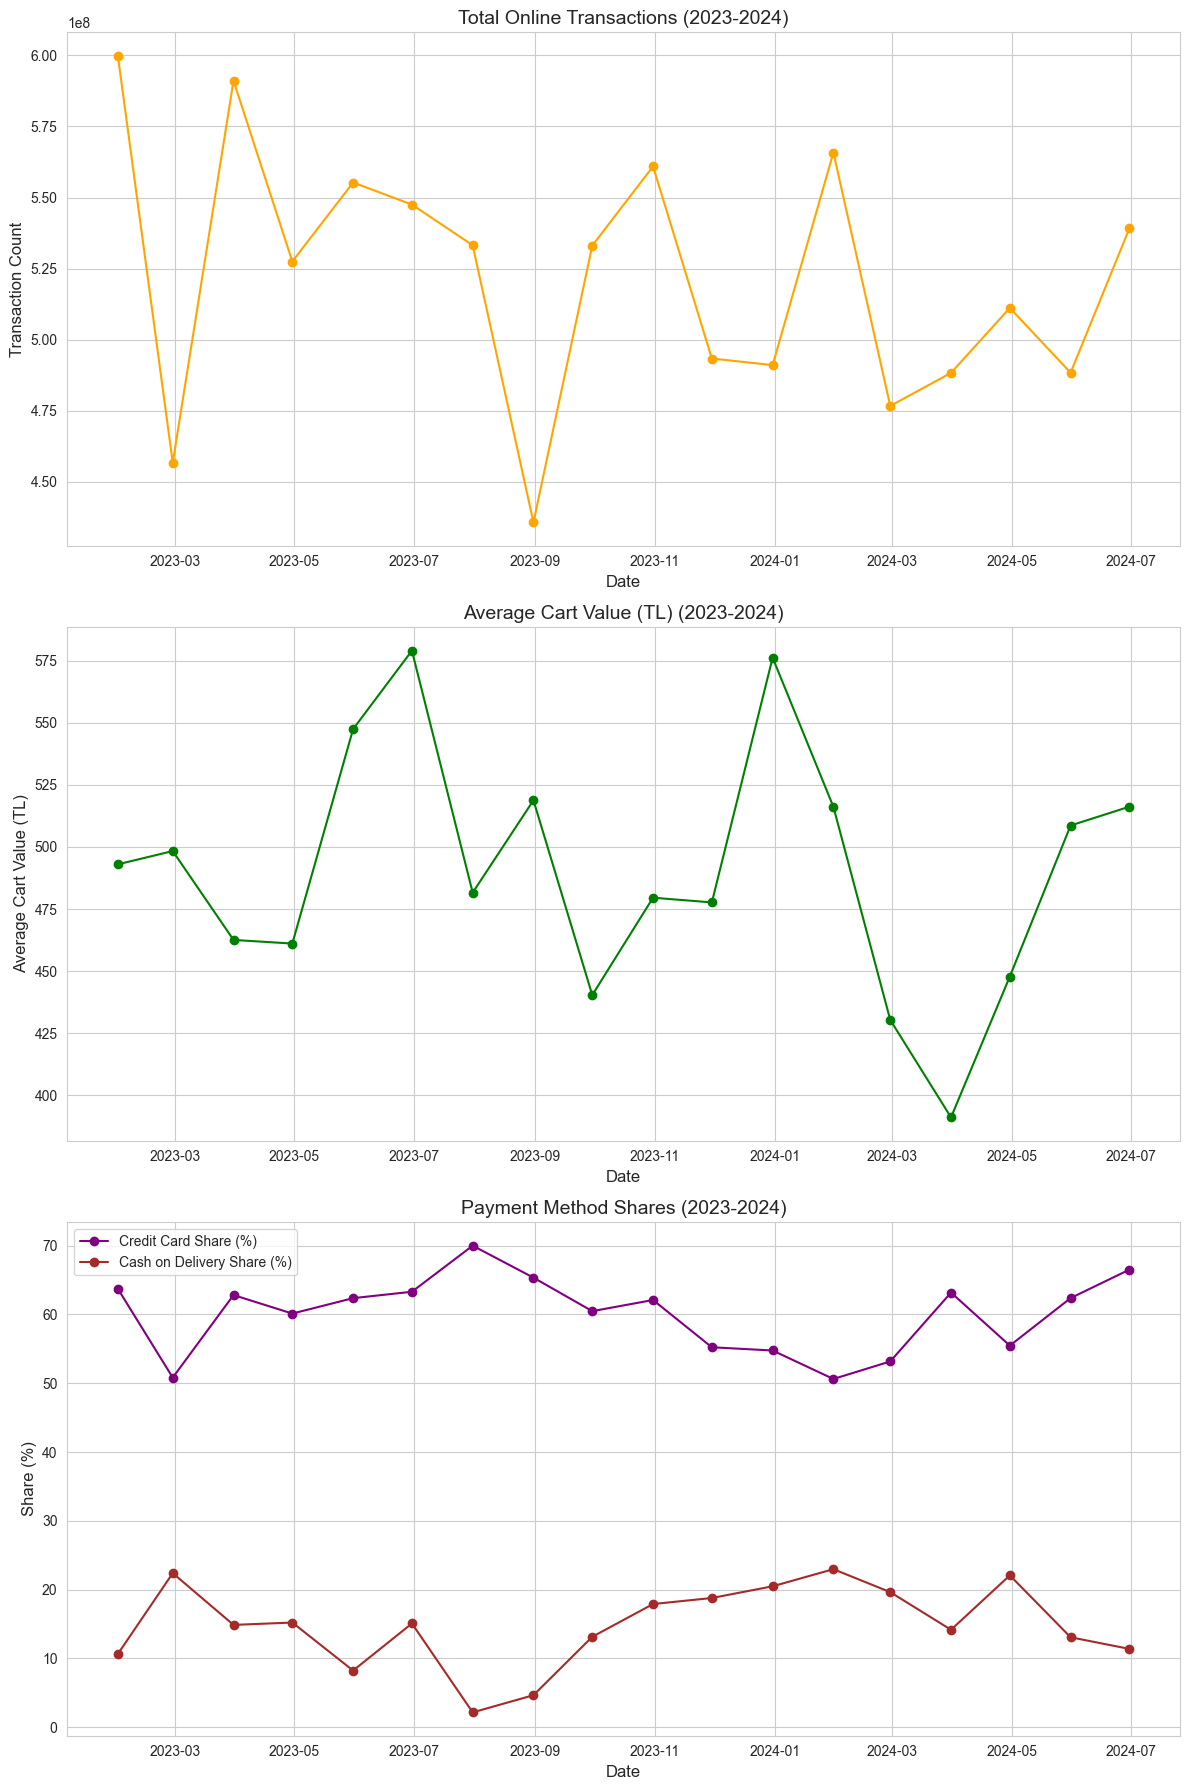


--- Sector Performance Analysis ---

Average Metrics by Sector:
                    Avg_Abandon_Rate  Avg_Cart_Value  Avg_Transaction_Count  \
Top_Selling_Sector                                                            
Food & Grocery             75.505000      488.645000           5.333605e+08   
Apparel & Footwear         73.580000      455.180000           5.511451e+08   
Home & Living              73.443333      512.083333           5.339657e+08   
Personal Care              70.020000      496.102500           4.679982e+08   
Electronics                68.517500      488.087500           5.412904e+08   
Sports & Outdoor           68.396667      488.373333           5.291268e+08   

                    Avg_Sales_Share  
Top_Selling_Sector                   
Food & Grocery            34.465000  
Apparel & Footwear        46.465000  
Home & Living             34.653333  
Personal Care             47.832500  
Electronics               38.550000  
Sports & Outdoor          31.270000 

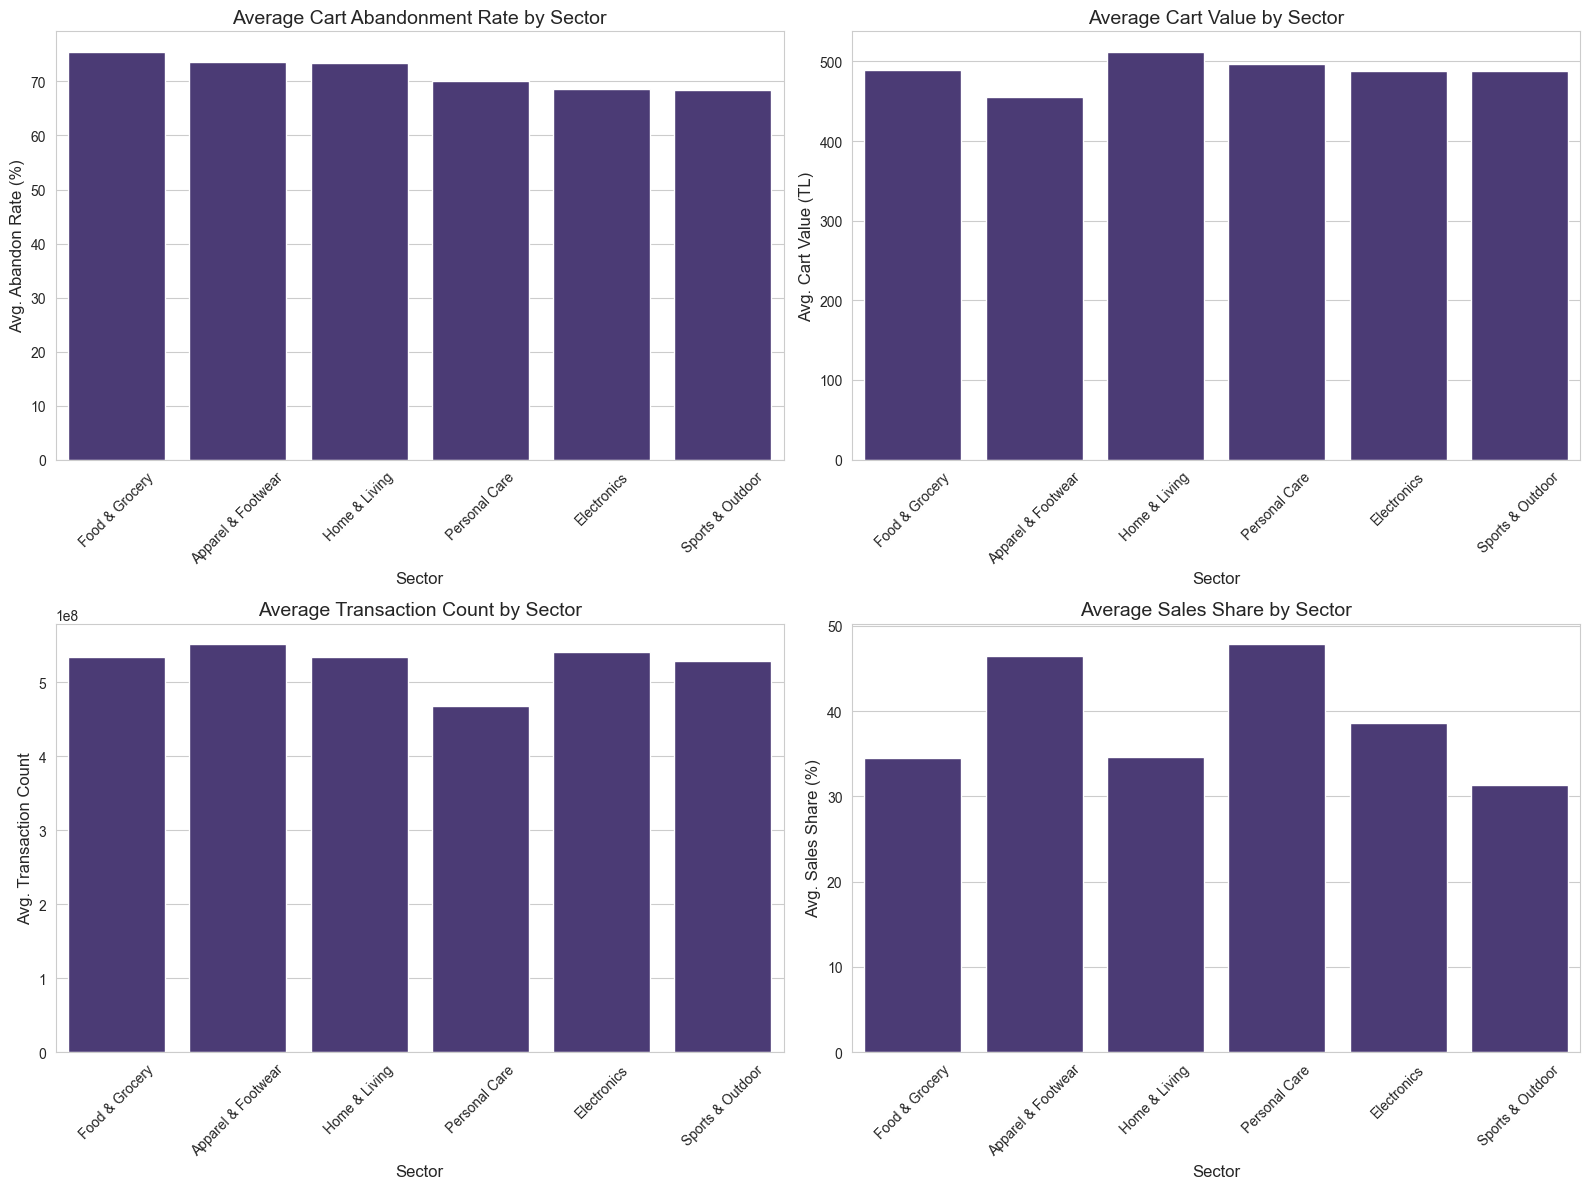


--- Analysis of Payment Method Impact on Cart Abandonment ---

Correlation Matrix:
                            Cart_Abandonment_Rate_PCT  Average_Cart_Value_TL  \
Cart_Abandonment_Rate_PCT                    1.000000              -0.063232   
Average_Cart_Value_TL                       -0.063232               1.000000   
Credit_Card_Share_PCT                       -0.089518               0.036472   
Cash_On_Delivery_Share_PCT                   0.353695              -0.091060   
Total_Transactions                           0.157680               0.091369   
Sector_Sales_Share_PCT                      -0.147137              -0.198411   

                            Credit_Card_Share_PCT  Cash_On_Delivery_Share_PCT  \
Cart_Abandonment_Rate_PCT               -0.089518                    0.353695   
Average_Cart_Value_TL                    0.036472                   -0.091060   
Credit_Card_Share_PCT                    1.000000                   -0.886016   
Cash_On_Delivery_Share_PCT     

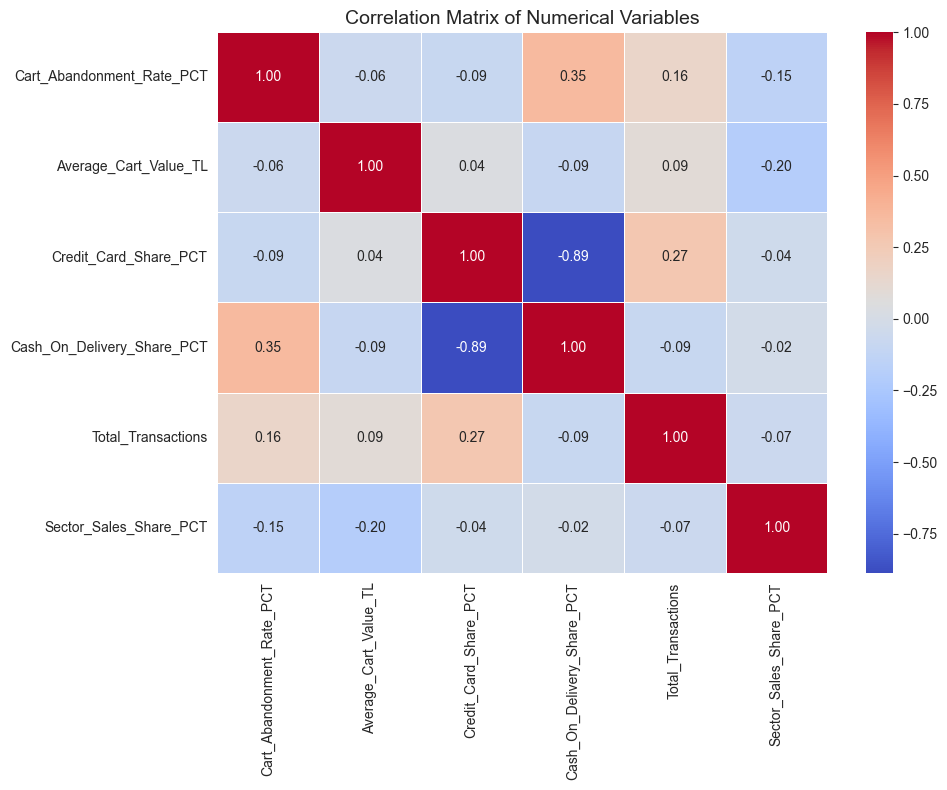

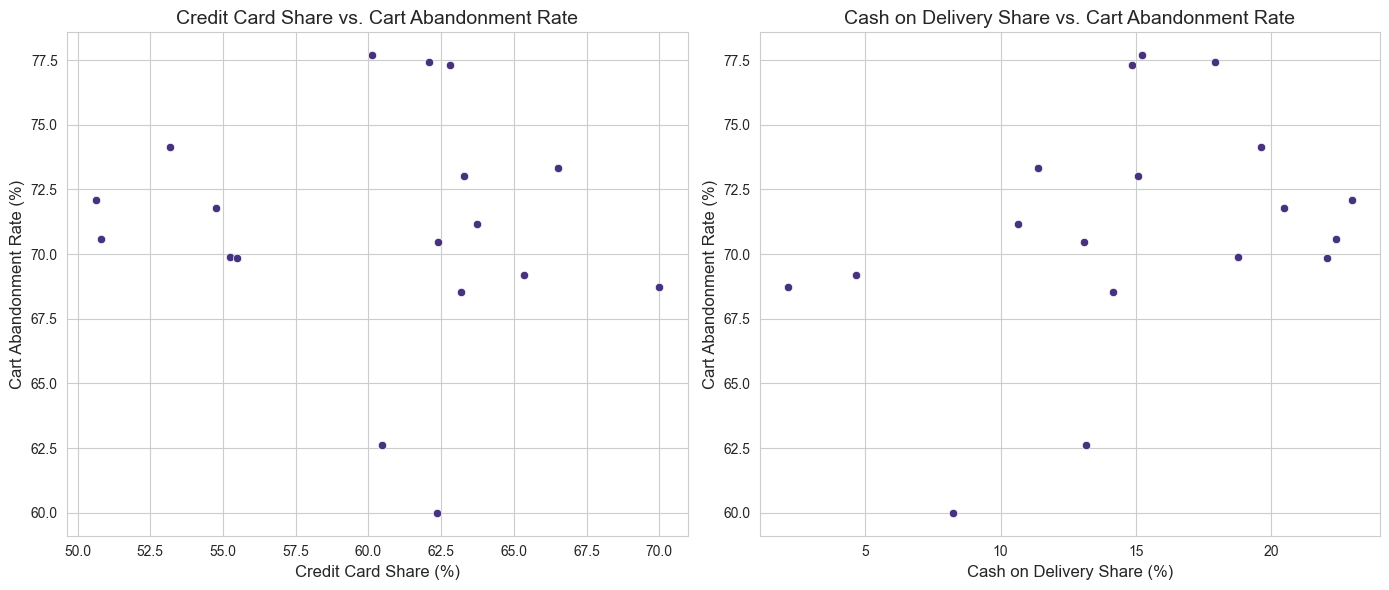


--- Average Cart Value Analysis ---


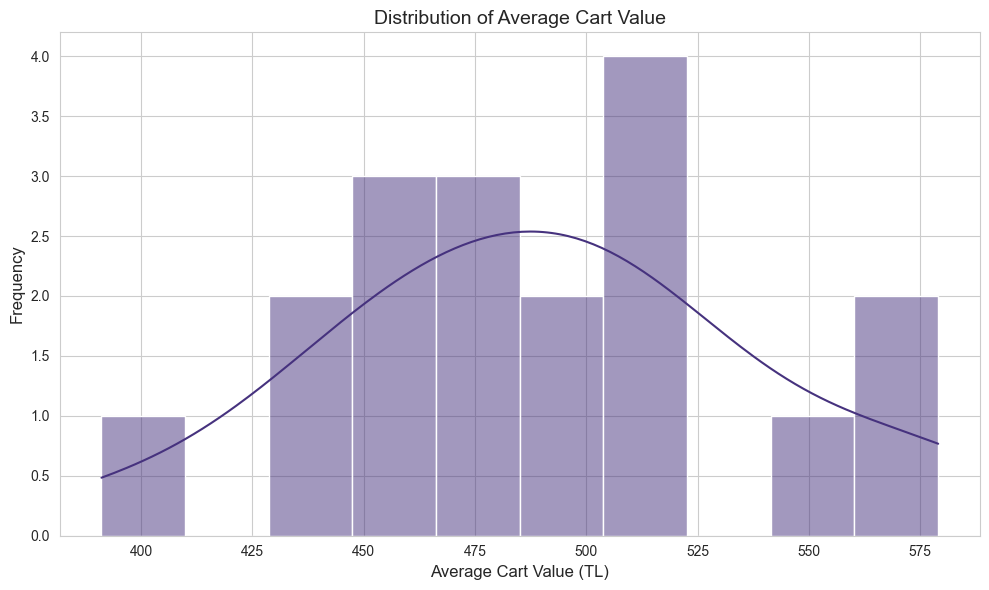

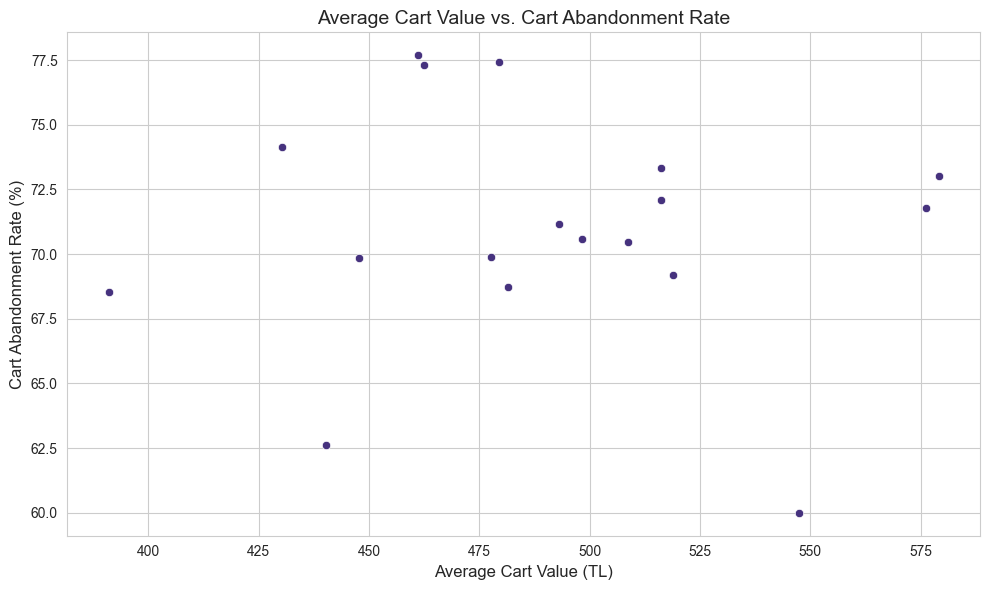


--- Comprehensive EDA Completed ---


In [4]:
data_path = '../data/turkiye_e_ticaret_simule_veri.csv'
print(f"Attempting to load data from: {data_path}")

import os
if not os.path.exists(data_path):
    print(f"ERROR: File not found at: {data_path}")
else:
    print("File found, loading...")

df = load_data(data_path)

print("--- Dataset Information ---")
print(df.head())
df.info()

run_all_analysis(df)
